# Task 1: Introduction

In [64]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [183]:
def generate_y(num=1000):
    W=[1.0,-3.0]
    b=-1.0
    
    W= np.reshape(W,(2,1))
    
    X= np.random.randn(num,2)
    
    y=b+ np.dot(X,W)
    
    y= np.reshape(y,(num,1)) + np.random.randn() 

    return X, y

In [184]:
X, y= generate_y()

In [185]:
print(y.shape, X.shape)

(1000, 1) (1000, 2)


In [186]:
print(X[0], y[0])

[ 0.70623577 -1.32339968] [3.53583386]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [187]:
class Model:
    def __init__(self, no_feature):
        self.no_feature=no_feature
        self.W=np.random.randn(no_feature,1)
        self.b=np.random.randn()

In [188]:
model= Model(2)
print(model.W)
print(model.b)

[[ 0.69737013]
 [-0.88778201]]
0.8697331110931079


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [189]:
class Model(Model):
    def forward_pass(self, X):
        y_hat= self.b + np.dot(X,self.W)
        return y_hat

In [190]:
y_hat=Model(2).forward_pass(X)
print(y_hat.shape, y_hat[0])

(1000, 1) [-1.15453353]


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [191]:
class Model(Model):
    def compute_loss(self, y_hat,y):
        loss= np.sum(np.square(y_hat-y))/(2*y_hat.shape[0])
        return loss

In [192]:
model=Model(2)
y_hat=model.forward_pass(X)
loss=model.compute_loss(y_hat,y)

In [193]:
loss

9.920119908935485

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [194]:
class Model(Model):
    def backward_pass(self, y_hat, y, X):
        db= np.sum(y_hat-y)/y.shape[0]
        dW= np.sum( np.dot( np.transpose(y_hat-y),X), axis=0) / y.shape[0]
        return db, dW

In [195]:
model=Model(2)

X, y= generate_y()
y_hat= model.forward_pass(X)

db, dw= model.backward_pass(y_hat, y, X)

In [196]:
print(dw, db)

[-1.99106249  2.97137083] 0.9180276388053478


# Task 7: Update Parameters

In [197]:
class Model(Model):
    def update_para(self, lr, dw, db):
        self.W= self.W - lr * np.reshape(dw,(self.no_feature,1))
        self.b= self.b - lr * db

# Task 8: Training Loop

In [198]:
class Model(Model):
    def train(self,x_train, y_train, lr, it):
        losses=[]
        for i in range(0,it):
            y_hat= self.forward_pass(x_train)
            loss= self.compute_loss(y_hat, y_train)
            db, dw= self.backward_pass(y_hat, y_train, x_train)
            self.update_para(lr, dw, db)
            losses.append(loss)
            
            if i%int(it/10)==0:
                print("Iter: {}, loss: {:.4f}".format(i,loss))
        return losses       

In [199]:
model=Model(2)

In [200]:
x_train, y_train= generate_y()

In [201]:
losses= model.train(x_train, y_train, 0.01, 1000)

Iter: 0, loss: 4.5388
Iter: 100, loss: 0.6918
Iter: 200, loss: 0.1068
Iter: 300, loss: 0.0167
Iter: 400, loss: 0.0026
Iter: 500, loss: 0.0004
Iter: 600, loss: 0.0001
Iter: 700, loss: 0.0000
Iter: 800, loss: 0.0000
Iter: 900, loss: 0.0000


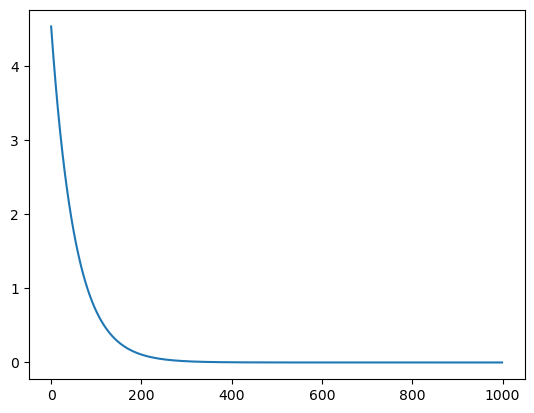

In [202]:
plt.plot(losses)

# Task 9: Predictions

In [235]:
model_untrained=Model(2)

x_test, y_test= generate_y(600)
print(x_test.shape, y_test.shape)

(600, 2) (600, 1)


In [236]:
pred_untrain= model_untrained.forward_pass(x_test)
pred_train= model.forward_pass(x_train)

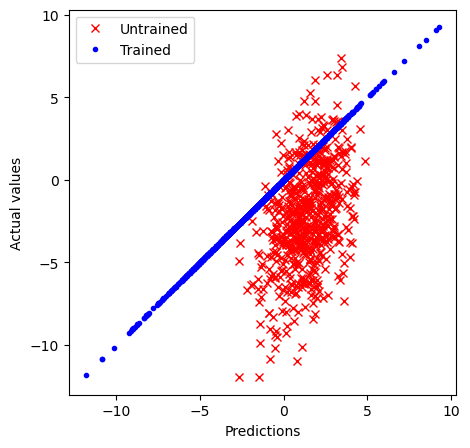

In [237]:
plt.figure(figsize=(5,5))
plt.plot(pred_untrain, y_test, 'rx', label='Untrained')
plt.plot(pred_train, y_train, 'b.', label='Trained')
plt.legend()
plt.xlabel("Predictions")
plt.ylabel("Actual values")
plt.show()